Analysis for the custom dataset

In [44]:
import numpy as np
import pandas as pd
import csv
import pickle
import matplotlib.pyplot as plt 


In [45]:
JOINT_PLK_PATH = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_custom_dataset_joint/eval_results/epoch_0_0.16363636363636364.pkl"
JOINT_MOTION_PLK_PATH = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_custom_dataset_joint_motion/eval_results/epoch_0_0.00909090909090909.pkl"
BONE_PLK_PATH = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_custom_dataset_bone/eval_results/epoch_0_0.13636363636363635.pkl"
BONE_MOTION_PLK_PATH = "/work/cvcs2024/SLR_sentiment_enhanced/SLRSE_model_data/SL-GCN/work_dir/test_custom_dataset_bone_motion/eval_results/epoch_0_0.045454545454545456.pkl"

LABEL_CSV_PATH = "/work/cvcs2024/SLR_sentiment_enhanced/datasets/custom/label.csv"

In [46]:
# Load data.
with open(JOINT_PLK_PATH, 'rb') as f:
    joint_dict = pickle.load(f)
with open(JOINT_MOTION_PLK_PATH, 'rb') as f:
    joint_motion_dict = pickle.load(f)
with open(BONE_PLK_PATH, 'rb') as f:
    bone_dict = pickle.load(f)
with open(BONE_MOTION_PLK_PATH, 'rb') as f:
    bone_motion_dict = pickle.load(f)

label_dict = {}
with open(LABEL_CSV_PATH, newline='\n') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        label_dict[str(row[0])] = int(row[1])

Joint
	User 0 accuracy: 0.1428571429
	User 1 accuracy: 0.1666666667
	User 2 accuracy: 0.1944444444
Joint Motion
	User 0 accuracy: 0.0000000000
	User 1 accuracy: 0.0000000000
	User 2 accuracy: 0.0277777778
Bone
	User 0 accuracy: 0.1428571429
	User 1 accuracy: 0.1388888889
	User 2 accuracy: 0.1388888889
Bone Motion
	User 0 accuracy: 0.0571428571
	User 1 accuracy: 0.0833333333
	User 2 accuracy: 0.0000000000


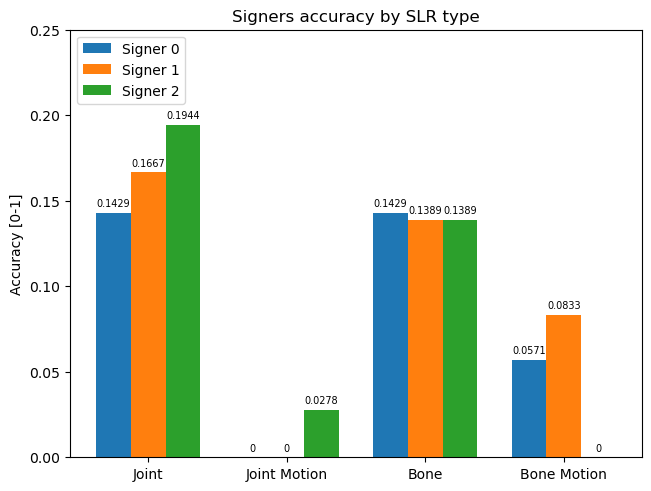

In [47]:
# Accuracy for user

def acc_per_file(file_dict):
    acc_sum = [0,0,0]
    acc_tot = [0,0,0]
    for name, l in label_dict.items():
        user_index = int(name[6])
        if user_index == 3:
            continue
        pred = file_dict[name].argmax()
        acc_tot[user_index] += 1
        if pred == l:
            acc_sum[user_index] += 1
    acc_list = []
    for i in range(len(acc_sum)):
        acc = acc_sum[i] / acc_tot[i]
        print(f"\tUser {i} accuracy: {acc:0.10f}")
        acc_list.append(acc)
    return acc_list

acc_list_list = []
print("Joint")
acc_list_list.append(acc_per_file(joint_dict))
print("Joint Motion")
acc_list_list.append(acc_per_file(joint_motion_dict))
print("Bone")
acc_list_list.append(acc_per_file(bone_dict))
print("Bone Motion")
acc_list_list.append(acc_per_file(bone_motion_dict))



# Plot
species = ("Joint", "Joint Motion", "Bone", "Bone Motion")
users_means = {
    'Signer 0': [np.round(v[0],4) for v in acc_list_list],
    'Signer 1': [np.round(v[1],4) for v in acc_list_list],
    'Signer 2': [np.round(v[2],4) for v in acc_list_list],
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in users_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fontsize=7)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy [0-1]')
ax.set_title('Signers accuracy by SLR type')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', labels=users_means.keys())
ax.set_ylim(0, 0.25)
plt.show()


Joint
	Straight accuracy: 0.2702702703
	Left accuracy: 0.1351351351
	Right accuracy: 0.0833333333
Joint Motion
	Straight accuracy: 0.0270270270
	Left accuracy: 0.0000000000
	Right accuracy: 0.0000000000
Bone
	Straight accuracy: 0.2972972973
	Left accuracy: 0.0810810811
	Right accuracy: 0.0277777778
Bone Motion
	Straight accuracy: 0.0540540541
	Left accuracy: 0.0270270270
	Right accuracy: 0.0555555556


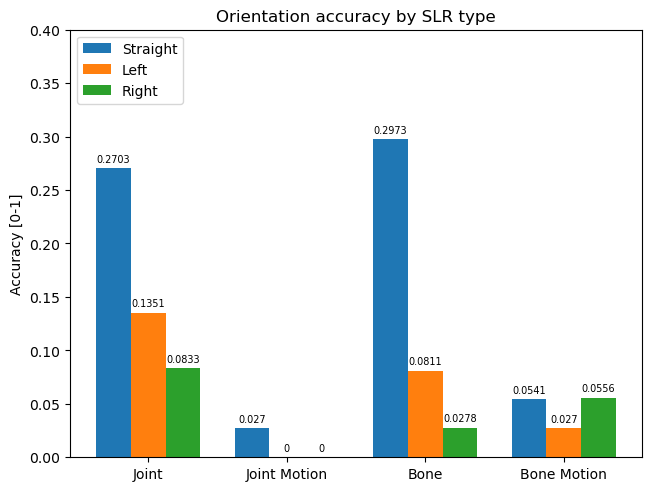

In [48]:
# Accuracy based on orientation.

orientation_dict = {
    'Straight': 0,
    'Left': 1,
    'Right': 2
}

def acc_per_file(file_dict):
    acc_sum = [0,0,0]
    acc_tot = [0,0,0]
    for name, l in label_dict.items():
        for k in orientation_dict.keys():
            if k in name:
                orientation_name = k
                orientation_index = orientation_dict[k]
        pred = file_dict[name].argmax()
        acc_tot[orientation_index] += 1
        if pred == l:
            acc_sum[orientation_index] += 1
    acc_list = []
    for k, idx in orientation_dict.items():
        acc = acc_sum[idx] / acc_tot[idx]
        print(f"\t{k} accuracy: {acc:0.10f}")
        acc_list.append(acc)
    return acc_list

acc_list_list = []
print("Joint")
acc_list_list.append(acc_per_file(joint_dict))
print("Joint Motion")
acc_list_list.append(acc_per_file(joint_motion_dict))
print("Bone")
acc_list_list.append(acc_per_file(bone_dict))
print("Bone Motion")
acc_list_list.append(acc_per_file(bone_motion_dict))



# Plot
species = ("Joint", "Joint Motion", "Bone", "Bone Motion")
users_means = {
    'Straight': [np.round(v[0],4) for v in acc_list_list],
    'Left': [np.round(v[1],4) for v in acc_list_list],
    'Right': [np.round(v[2],4) for v in acc_list_list],
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in users_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fontsize=7)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy [0-1]')
ax.set_title('Orientation accuracy by SLR type')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', labels=users_means.keys())
ax.set_ylim(0, 0.4)
plt.show()